# COGS 118A- Project Checkpoint

# Names

- Evan Eguchi
- Thomas Fratantoni
- Zachary Tulman
- Charles Ye

# Abstract 
Despite the probability of predicting a March Madness basketball bracket being 1 in 9.2 quintillion, many still (unsuccessfully) attempt to create a "perfect bracket". Our goal is to try to create a prediction model that can produce an accurate March Madness bracket to a high degree. Collegiate team data will range from the season stats and averages of each team, the rankings of each team, and even to other non-basketball stats like the distance a team has to travel to play.

The first area to tackle with the data would be narrowing down which specific statistics to utilize for the model. The type of model we use will be determined later, but ultimately we will split the data up into testing and training subsets, using the training data to create our model and the test data to measure its accuracy. The most likely split will be the test data being the most recent season’s data, and the training set to be most of the previous seasons’ data.

The performance of the prediction model will be measured with a subset of test brackets, which we will separate from the total population of previous brackets played. The test set will most likely consist of the latest played March Madness tournaments.

# Background

The March Madness Division I basketball tournament is an extremely popular sporting event that acts as the playoffs for collegiate men’s basketball. The format of the tournament is a single elimination, 68 team bracket played over the course of 3 weekends through March and April. The tournament began in 1939, initially only hosting 8 teams. As the Division I tournament grew in popularity, the number of teams also grew until in 1985 it expanded to its current 68 team layout and expanded its absurd probability of predicting a “perfect bracket” (a bracket that correctly predicts the winner of every game) <a name="wilco"></a>[<sup>[1]</sup>](#wilconote). Despite the 1 in 9.2 quintillion odds, every year millions of people take a shot at filling out their own bracket, and it has become a fun tradition for March Madness enthusiasts and inexperienced basketball fans alike.

Of course, many have also taken a shot at creating different algorithms to increase their chances at predicting a perfect bracket as much as they can. The most important features of this predictor algorithm seems to be the type of methodology used to run the probability algorithms, as well as the statistics used for the data. One algorithm made by Kaito Goto, which won two Solo Silver Medals at the Kaggle March Madness competition, which utilized seeding, form, efficiency, and blocks per foul in a Gradient Boosting Machine (sequential set of regressions) model <a name="goto"></a>[<sup>[2]</sup>](#gotonote). The interesting thing about Goto’s model is the usage of stats. One would infer that the main statistics such as ranking, points, assists, rebounds, etc. would be used for prediction, but the chosen stats for this model seem to be much less focused on. Looking at Goto’s model, it might be a good idea to broaden our parameter search to include more obscure statistics like Goto did, in order to increase the likelihood of finding a combination of parameters with a higher predictive probability.

Another machine learning algorithm, made by Adrian Pierce and Lotan Weininger, finished in the top ten percent in the Google Machine Learning competition. In their approach, the statistics utilized were the Pomeroy ranking (team rankings created by Ken Pomeroy, a leading college basketball statistician), offensive rating, defensive rating, net rating, tempo, possession time per game, and adjusted Pomeroy ranking (adjusted for non-linearity). For the method, they chose to use a logistic regression model to fit their data and create a model. Along with the pattern of different combinations of stats being used, another interesting point that Pierce and Weininger chose to elaborate was their model fine tuning. They described that they did a lot of fine tuning for the current bracket they were doing, which means that instead of making a general March Madness prediction algorithm, a fine tuned model that predicts a single year is more feasible and accurate. Intuitively, this makes sense, as each year a variety of factors play into the features and structure of each year’s unique bracket <a name="pierce"></a>[<sup>[3]</sup>](#piercenote). Creating a unique prediction algorithm for the most recent year instead of a general predictor would probably be our method going forward.

# Problem Statement

The problem that we are solving is to predict a perfect March Madness bracket or to predict a bracket as close to perfect as possible. Since there are so many different possibilities (9.2 quintillion possible brackets), this problem can’t be feasibly solved by just guessing. The odds are so low that even with the use of technology, it is very difficult to predict a perfect March Madness bracket. Despite the odds, in this project we will attempt to create a classification model that can accurately predict a March Madness bracket based on NCAA men’s basketball data and the results of previous March Madness tournaments.

# Data

Kaggle.com has a large amount of historical NCAA men’s basketball data (available at https://www.kaggle.com/c/mens-march-mania-2022/data). This site contains decades of regular season and March Madness data, containing multiple datasets with thousands of rows each. For example, the file entitled MRegularSeasonCompactResults.csv contains 170,000 rows and 8 columns. Another dataset, MNCAATourneyDetailedResults.csv, contains 34 variables, including points, assists, field goals made, offensive rating, and more for both the winning and losing teams. It will be critical to train our model on the differences between a winning team’s stats and a losing team’s stats in order for it to classify teams effectively. The vast majority of the variables in these datasets are numeric, which will be useful since we can expect them to be easier to analyze than categorical variables. One of the main issues we will have to face when dealing with this dataset is the question of what we should and should not include in our model. We may choose to pull data from a few different datasets, in which case we will have to consider how to combine them. From a brief skim of the datasets, it appears that there are very few missing values, so cleaning should not be a huge issue.

As of now, the most important variables in the data that we will be using for our model are score, field goals, assists, turnovers, steals, blocks, personal fouls. These are the specific variables that will be used in our model to calculate the win rate of any given team.

There were no missing values in the initial datasets, so no cleaning was required there. Various datasets were created for the purpose of EDA, but the main dataset that was used in our preliminary results contained only the important variables mentioned above and whether that team won or lost.

Below is our data wrangling and EDA, mainly consisting of data consolidation and merging to gather key stats in unified locations. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# https://www.kaggle.com/c/mens-march-mania-2022/data
file_path = 'mens-march-mania-2022/MDataFiles_Stage1/'
data = pd.read_csv(file_path + 'MNCAATourneyDetailedResults.csv')
teams_data = pd.read_csv(file_path + 'MTeams.csv')
season_data = pd.read_csv(file_path + 'MRegularSeasonDetailedResults.csv')
seed_data = pd.read_csv(file_path + 'MNCAATourneySeeds.csv')
ordinal_data = pd.read_csv(file_path + 'MMasseyOrdinals.csv')

In [3]:
# want to see all columns
pd.set_option('display.max_columns', None)
data.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,11,29,17,26,14,30,17,12,5,3,22,29,67,12,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,7,23,11,14,11,36,22,16,10,7,8,20,64,4,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,6,14,16,22,10,27,18,9,7,4,19,25,69,7,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,3,7,18,25,11,20,15,18,13,1,19,27,60,7,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,7,20,15,23,18,20,17,13,8,2,14,25,56,9,21,15,20,10,26,16,14,5,8,19


In [4]:
season_data.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14


In [5]:
# checking for missing values
data.isna().sum()
# no nan values here!

Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
WFGM       0
WFGA       0
WFGM3      0
WFGA3      0
WFTM       0
WFTA       0
WOR        0
WDR        0
WAst       0
WTO        0
WStl       0
WBlk       0
WPF        0
LFGM       0
LFGA       0
LFGM3      0
LFGA3      0
LFTM       0
LFTA       0
LOR        0
LDR        0
LAst       0
LTO        0
LStl       0
LBlk       0
LPF        0
dtype: int64

In [6]:
# checking for missing values
season_data.isna().sum()
# no nan values here!

Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
WFGM       0
WFGA       0
WFGM3      0
WFGA3      0
WFTM       0
WFTA       0
WOR        0
WDR        0
WAst       0
WTO        0
WStl       0
WBlk       0
WPF        0
LFGM       0
LFGA       0
LFGM3      0
LFGA3      0
LFTM       0
LFTA       0
LOR        0
LDR        0
LAst       0
LTO        0
LStl       0
LBlk       0
LPF        0
dtype: int64

In [7]:
# data stats
data.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000
mean,2011.650296,139.109229,1293.542760,75.234547,1294.587638,63.707028,0.071126,26.344623,55.462320,7.022862,18.298899,15.522439,21.328535,10.523285,25.861135,14.259949,11.447925,6.392887,3.944962,16.324301,22.911939,57.712108,6.254022,20.502964,11.629128,16.617273,10.970364,21.368332,11.409822,12.171041,5.707875,2.939881,18.853514
std,5.274224,4.234734,102.884842,10.724755,105.945614,10.305693,0.294045,4.751158,7.225518,2.965677,5.679989,6.059217,7.681727,3.978822,5.002307,4.341092,3.812563,2.977842,2.526038,3.860358,4.104239,7.300343,2.761999,5.826098,5.114416,6.609636,4.215384,4.463864,3.641061,3.920983,2.670336,2.045817,4.232007
min,2003.000000,134.000000,1101.000000,47.000000,1101.000000,29.000000,0.000000,13.000000,34.000000,0.000000,4.000000,0.000000,1.000000,0.000000,13.000000,3.000000,2.000000,0.000000,0.000000,5.000000,11.000000,37.000000,0.000000,5.000000,0.000000,2.000000,1.000000,8.000000,2.000000,3.000000,0.000000,0.000000,7.000000
25%,2007.000000,136.000000,1211.000000,68.000000,1210.000000,57.000000,0.000000,23.000000,51.000000,5.000000,14.000000,11.000000,16.000000,8.000000,22.000000,11.000000,9.000000,4.000000,2.000000,14.000000,20.000000,53.000000,4.000000,16.000000,8.000000,12.000000,8.000000,18.000000,9.000000,9.000000,4.000000,1.000000,16.000000
50%,2012.000000,137.000000,1277.000000,75.000000,1295.000000,63.000000,0.000000,26.000000,55.000000,7.000000,18.000000,15.000000,21.000000,10.000000,26.000000,14.000000,11.000000,6.000000,4.000000,16.000000,23.000000,58.000000,6.000000,20.000000,11.000000,16.000000,11.000000,21.000000,11.000000,12.000000,6.000000,3.000000,19.000000
75%,2016.000000,139.000000,1393.000000,82.000000,1393.000000,71.000000,0.000000,29.000000,60.000000,9.000000,22.000000,19.000000,26.000000,13.000000,29.000000,17.000000,14.000000,8.000000,5.000000,19.000000,26.000000,63.000000,8.000000,24.000000,15.000000,21.000000,14.000000,24.000000,14.000000,15.000000,7.000000,4.000000,22.000000
max,2021.000000,154.000000,1463.000000,121.000000,1463.000000,105.000000,2.000000,44.000000,84.000000,18.000000,41.000000,38.000000,48.000000,26.000000,43.000000,29.000000,28.000000,20.000000,15.000000,30.000000,36.000000,85.000000,18.000000,42.000000,31.000000,39.000000,29.000000,42.000000,23.000000,27.000000,19.000000,13.000000,33.000000


In [8]:
# season_data stats
season_data.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000,100423.000000
mean,2012.489350,70.513169,1287.600341,75.549396,1282.113341,63.548978,0.068311,26.228991,55.458122,7.218227,18.927069,15.873196,22.297083,10.669667,25.756829,14.712695,12.874202,6.983868,3.799120,16.880814,22.665146,56.574281,6.128994,19.849148,12.089611,17.841909,10.824004,21.714886,11.415582,14.196698,6.000040,2.864951,19.076546
std,5.564818,35.408043,104.947734,11.059565,104.123614,10.894962,0.305483,4.688120,7.526434,3.095434,5.927677,6.245465,8.119103,4.142087,4.910566,4.411885,4.006917,3.107018,2.441147,4.950588,4.364286,7.627384,2.795085,6.029684,5.356261,7.123095,4.221449,4.544578,3.728140,4.385896,2.753956,2.026886,5.483882
min,2003.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000,10.000000,27.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.000000,26.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,40.000000,1198.000000,68.000000,1191.000000,56.000000,0.000000,23.000000,50.000000,5.000000,15.000000,11.000000,17.000000,8.000000,22.000000,12.000000,10.000000,5.000000,2.000000,14.000000,20.000000,51.000000,4.000000,16.000000,8.000000,13.000000,8.000000,19.000000,9.000000,11.000000,4.000000,1.000000,16.000000
50%,2013.000000,73.000000,1286.000000,75.000000,1281.000000,63.000000,0.000000,26.000000,55.000000,7.000000,19.000000,15.000000,22.000000,10.000000,26.000000,14.000000,13.000000,7.000000,3.000000,17.000000,23.000000,56.000000,6.000000,19.000000,12.000000,17.000000,10.000000,22.000000,11.000000,14.000000,6.000000,3.000000,19.000000
75%,2017.000000,101.000000,1380.000000,83.000000,1373.000000,71.000000,0.000000,29.000000,60.000000,9.000000,23.000000,20.000000,28.000000,13.000000,29.000000,17.000000,15.000000,9.000000,5.000000,20.000000,25.000000,61.000000,8.000000,24.000000,15.000000,22.000000,13.000000,25.000000,14.000000,17.000000,8.000000,4.000000,22.000000
max,2022.000000,132.000000,1472.000000,144.000000,1472.000000,140.000000,6.000000,57.000000,103.000000,26.000000,56.000000,48.000000,67.000000,38.000000,54.000000,41.000000,33.000000,26.000000,21.000000,41.000000,47.000000,106.000000,22.000000,59.000000,42.000000,61.000000,36.000000,49.000000,31.000000,41.000000,22.000000,18.000000,45.000000


In [9]:
# add team names to team id's
data['WTeamName'] = [teams_data[teams_data['TeamID'] == x].iloc[0,1] for x in data['WTeamID']]
data['LTeamName'] = [teams_data[teams_data['TeamID'] == x].iloc[0,1] for x in data['LTeamID']]
season_data['WTeamName'] = [teams_data[teams_data['TeamID'] == x].iloc[0,1] for x in season_data['WTeamID']]
season_data['LTeamName'] = [teams_data[teams_data['TeamID'] == x].iloc[0,1] for x in season_data['LTeamID']]

In [10]:
# add seeds/rankings to each winning/losing team row
data['WSeed'] = [int(seed_data[(seed_data['Season']==data['Season'][x]) & (seed_data['TeamID']==data['WTeamID'][x])].iloc[0,1][1:3]) for x in range(len(data))]
data['LSeed'] = [int(seed_data[(seed_data['Season']==data['Season'][x]) & (seed_data['TeamID']==data['LTeamID'][x])].iloc[0,1][1:3]) for x in range(len(data))]
data['WOrdinalRank'] = [ordinal_data[(ordinal_data['Season']==data['Season'][x]) & (ordinal_data['TeamID']==data['WTeamID'][x])].iloc[0,4] for x in range(len(data))]
data['LOrdinalRank'] = [ordinal_data[(ordinal_data['Season']==data['Season'][x]) & (ordinal_data['TeamID']==data['LTeamID'][x])].iloc[0,4] for x in range(len(data))]

In [11]:
#calculate number of wins and losses or each team
team_wins = season_data.groupby(['Season', 'WTeamID']).count()
team_wins = team_wins.reset_index()[['Season', 'WTeamID', 'WScore']].rename(columns = {'WTeamID': 'TeamID', 'WScore': 'NumWins'})
team_losses = season_data.groupby(['Season', 'LTeamID']).count()
team_losses = team_losses.reset_index()[['Season', 'LTeamID', 'LScore']].rename(columns = {'LTeamID': 'TeamID', 'LScore': 'NumLosses'})

In [12]:
#create a dataframe containing the information on wins and losses
data_features_w = season_data.groupby(['Season', 'WTeamID']).count().reset_index()[['Season', 'WTeamID']].rename(columns={"WTeamID": "TeamID"})
data_features_l = season_data.groupby(['Season', 'LTeamID']).count().reset_index()[['Season', 'LTeamID']].rename(columns={"LTeamID": "TeamID"})
data_features = pd.concat([data_features_w, data_features_l], 0).drop_duplicates().sort_values(['Season', 'TeamID']).reset_index(drop=True)
data_features = data_features.merge(team_wins, on=['Season', 'TeamID'], how='left')
data_features = data_features.merge(team_losses, on=['Season', 'TeamID'], how='left')
data_features.fillna(0, inplace=True)
data_features['WinPct'] = data_features['NumWins'] / (data_features['NumWins'] + data_features['NumLosses'])

/var/folders/6_/1csns7v17fs7hhm43fhdcyfr0000gn/T/ipykernel_40269/4091683511.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  data_features = pd.concat([data_features_w, data_features_l], 0).drop_duplicates().sort_values(['Season', 'TeamID']).reset_index(drop=True)


In [13]:
data.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WTeamName,LTeamName,WSeed,LSeed,WOrdinalRank,LOrdinalRank
0,2003,134,1421,92,1411,84,N,1,32,69,11,29,17,26,14,30,17,12,5,3,22,29,67,12,31,14,31,17,28,16,15,5,0,22,UNC Asheville,TX Southern,16,16,218,231
1,2003,136,1112,80,1436,51,N,0,31,66,7,23,11,14,11,36,22,16,10,7,8,20,64,4,16,7,7,8,26,12,17,10,3,15,Arizona,Vermont,1,16,26,192
2,2003,136,1113,84,1272,71,N,0,31,59,6,14,16,22,10,27,18,9,7,4,19,25,69,7,28,14,21,20,22,11,12,2,5,18,Arizona St,Memphis,10,7,89,67
3,2003,136,1141,79,1166,73,N,0,29,53,3,7,18,25,11,20,15,18,13,1,19,27,60,7,17,12,17,14,17,20,21,6,6,21,C Michigan,Creighton,11,6,63,3
4,2003,136,1143,76,1301,74,N,1,27,64,7,20,15,23,18,20,17,13,8,2,14,25,56,9,21,15,20,10,26,16,14,5,8,19,California,NC State,8,9,116,29


In [14]:
season_data.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WTeamName,LTeamName
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,Alabama,Oklahoma
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,Memphis,Syracuse
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,Marquette,Villanova
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,N Illinois,Winthrop
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,Texas,Georgia


In [15]:
data_features.head()

,Season,TeamID,NumWins,NumLosses,WinPct
0,2003,1102,12.0,16.0,0.428571
1,2003,1103,13.0,14.0,0.481481
2,2003,1104,17.0,11.0,0.607143
3,2003,1105,7.0,19.0,0.269231
4,2003,1106,13.0,15.0,0.464286


### EDA of Tournament Data Stat Differentials

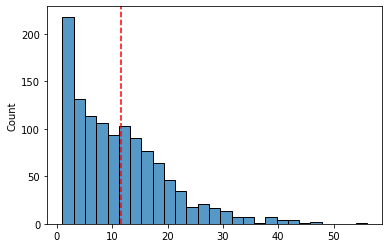

In [16]:
# histogram of point differentials
sns.histplot(data['WScore']-data['LScore'])
plt.axvline(x=(data['WScore']-data['LScore']).mean(),
            color='red', ls='--')

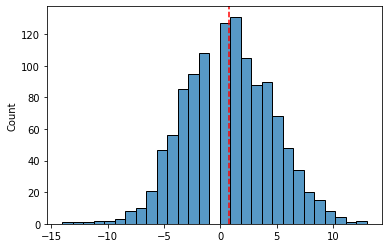

In [17]:
# histogram of 3 point make differentials
sns.histplot(data['WFGM3']-data['LFGM3'])
plt.axvline(x=(data['WFGM3']-data['LFGM3']).mean(),
            color='red', ls='--')

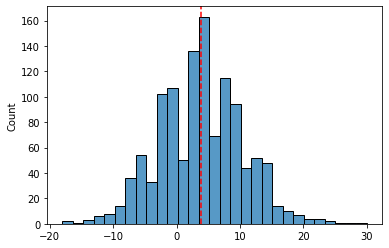

In [18]:
# histogram of free throw make differentials
sns.histplot(data['WFTM']-data['LFTM'])
plt.axvline(x=(data['WFTM']-data['LFTM']).mean(),
            color='red', ls='--')

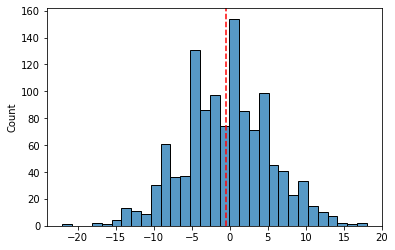

In [19]:
# histogram of offensive rating differentials
sns.histplot(data['WOR']-data['LOR'])
plt.axvline(x=(data['WOR']-data['LOR']).mean(),
            color='red', ls='--')

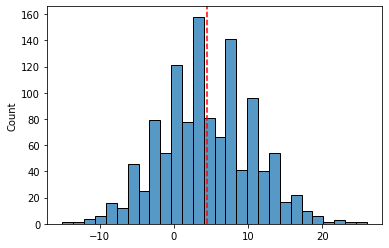

In [20]:
# histogram of defensive rating differentials
sns.histplot(data['WDR']-data['LDR'])
plt.axvline(x=(data['WDR']-data['LDR']).mean(),
            color='red', ls='--')

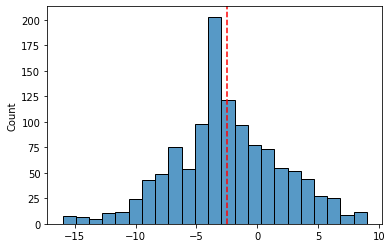

In [21]:
# histogram of personal foul differentials
sns.histplot(data['WPF']-data['LPF'])
plt.axvline(x=(data['WPF']-data['LPF']).mean(),
            color='red', ls='--')

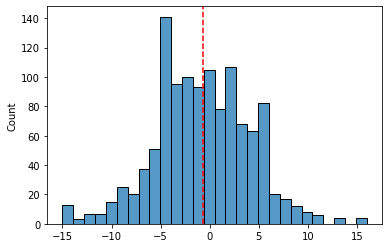

In [22]:
# histogram of turnover differentials
sns.histplot(data['WTO']-data['LTO'])
plt.axvline(x=(data['WTO']-data['LTO']).mean(),
            color='red', ls='--')

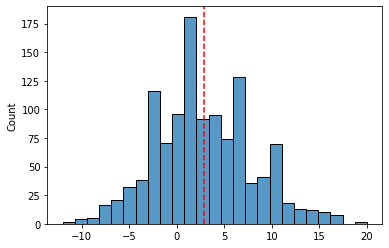

In [23]:
# histogram of assist differentials
sns.histplot(data['WAst']-data['LAst'])
plt.axvline(x=(data['WAst']-data['LAst']).mean(),
            color='red', ls='--')

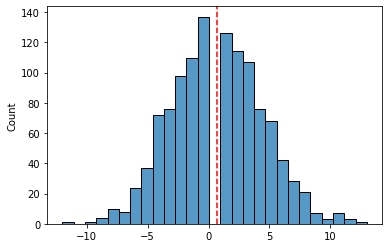

In [24]:
# histogram of steal differentials
sns.histplot(data['WStl']-data['LStl'])
plt.axvline(x=(data['WStl']-data['LStl']).mean(),
            color='red', ls='--')

### EDA of Season Data Stat Differentials

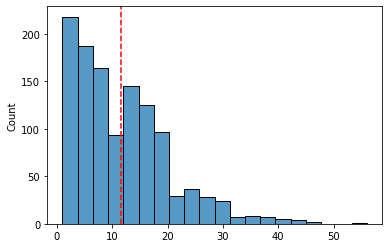

In [25]:
# histogram of point differentials
sns.histplot(data['WScore']-data['LScore'], bins=20)
plt.axvline(x=(data['WScore']-data['LScore']).mean(),
            color='red', ls='--')

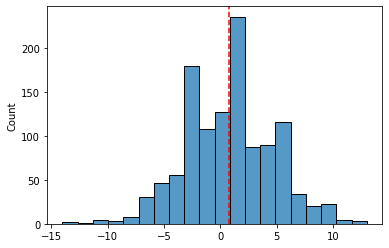

In [26]:
# histogram of 3 point make differentials
sns.histplot(data['WFGM3']-data['LFGM3'], bins=20)
plt.axvline(x=(data['WFGM3']-data['LFGM3']).mean(),
            color='red', ls='--')

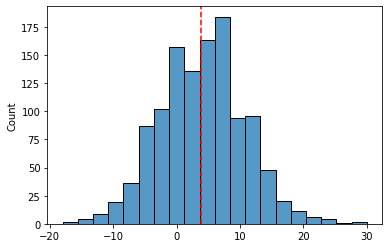

In [27]:
# histogram of free throw make differentials
sns.histplot(data['WFTM']-data['LFTM'], bins=20)
plt.axvline(x=(data['WFTM']-data['LFTM']).mean(),
            color='red', ls='--')

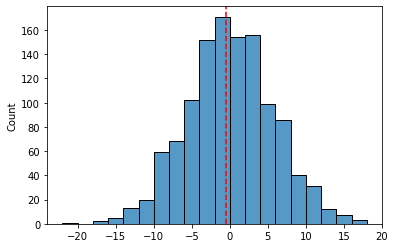

In [28]:
# histogram of offensive rating differentials
sns.histplot(data['WOR']-data['LOR'], bins=20)
plt.axvline(x=(data['WOR']-data['LOR']).mean(),
            color='red', ls='--')

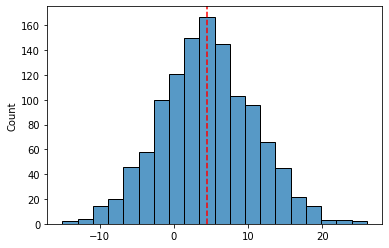

In [29]:
# histogram of defensive rating differentials
sns.histplot(data['WDR']-data['LDR'], bins=20)
plt.axvline(x=(data['WDR']-data['LDR']).mean(),
            color='red', ls='--')

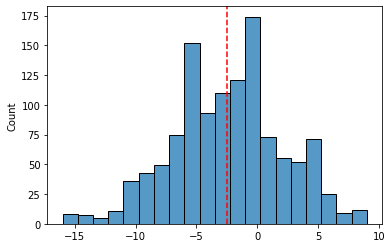

In [30]:
# histogram of personal foul differentials
sns.histplot(data['WPF']-data['LPF'], bins=20)
plt.axvline(x=(data['WPF']-data['LPF']).mean(),
            color='red', ls='--')

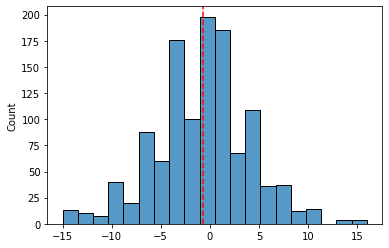

In [31]:
# histogram of turnover differentials
sns.histplot(data['WTO']-data['LTO'], bins=20)
plt.axvline(x=(data['WTO']-data['LTO']).mean(),
            color='red', ls='--')

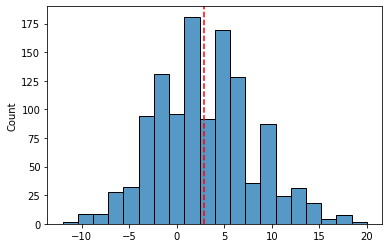

In [32]:
# histogram of assist differentials
sns.histplot(data['WAst']-data['LAst'], bins=20)
plt.axvline(x=(data['WAst']-data['LAst']).mean(),
            color='red', ls='--')

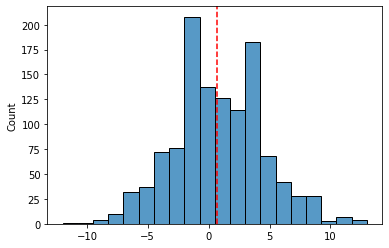

In [33]:
# histogram of steal differentials
sns.histplot(data['WStl']-data['LStl'], bins=20)
plt.axvline(x=(data['WStl']-data['LStl']).mean(),
            color='red', ls='--')

# Proposed Solution

With the above mentioned data, we propose to build a classification predictive model using historical March Madness results to predict the winner of each game and in turn, the eventual champion. We would train our classification model by comparing the statistical differences(such as offensive rating, defensive rating, country rank, distance between college and arena, etc.) between each winning team and losing team. As we further acquaint ourselves with the datasets and relevant statistics, we can later choose to pull only the most relevant data in our training model. Once we’ve created our trained model, we can then test our model using historical March Madness brackets to gauge its effectiveness. The model would be given the statistics of two teams in a historical matchup and would then predict the winner. We would then compare the predicted winner to the actual winner in the real game. We are currently testing models using logistic regression, but we are also considering comparing the performance of the logistic regression model with that of a gradient-boosting decision tree-based model. In that case, the algorithm that performs better will be used for the remainder of the project.

# Evaluation Metrics

The accuracy of our generated brackets compared to actual March Madness results will be the main evaluation metric that we will use to determine how well our model performs. The more matches the model is able to accurately predict, the higher the accuracy of the model will be and vice versa. We will calculate accuracy by taking the total number of matches accurately predicted in a single tournament and dividing it by the total number of matches in that tournament.

# Preliminary results

In order to determine if we are moving in the right direction, we performed logistic regression using various team statistics in an attempt to predict win rates with that data.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

pd.set_option('display.max_columns', None)

In [36]:
data = pd.read_csv(file_path + 'MNCAATourneyDetailedResults.csv')

In [37]:
data.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,11,29,17,26,14,30,17,12,5,3,22,29,67,12,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,7,23,11,14,11,36,22,16,10,7,8,20,64,4,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,6,14,16,22,10,27,18,9,7,4,19,25,69,7,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,3,7,18,25,11,20,15,18,13,1,19,27,60,7,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,7,20,15,23,18,20,17,13,8,2,14,25,56,9,21,15,20,10,26,16,14,5,8,19


In [38]:
wins_data = data[['WScore', 'WFGM', 'WFGM3', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']]
wins_data.rename(columns = {'WScore':'Score', 
                            'WFGM':'FGM',
                            'WFGM3':'FGM3',
                            'WAst':'Ast',
                            'WTO':'TO',
                            'WStl':'Stl',
                            'WBlk':'Blk',
                            'WPF':'PF'
                           }, inplace = True)
wins_data['Won'] = 1

losses_data = data[['LScore', 'LFGM', 'LFGM3', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']]
losses_data.rename(columns = {'LScore':'Score', 
                            'LFGM':'FGM',
                            'LFGM3':'FGM3',
                            'LAst':'Ast',
                            'LTO':'TO',
                            'LStl':'Stl',
                            'LBlk':'Blk',
                            'LPF':'PF'
                           }, inplace = True)
losses_data['Won'] = 0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/var/folders/6_/1csns7v17fs7hhm43fhdcyfr0000gn/T/ipykernel_40269/3715272996.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wins_data['Won'] = 1
/var/folders/6_/1csns7v17fs7hhm43fhdcyfr0000gn/T/ipykernel_40269/3715272996.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [39]:
df = pd.concat([wins_data, losses_data])

In [40]:
df.head()

,Score,FGM,FGM3,Ast,TO,Stl,Blk,PF,Won
0,92,32,11,17,12,5,3,22,1
1,80,31,7,22,16,10,7,8,1
2,84,31,6,18,9,7,4,19,1
3,79,29,3,15,18,13,1,19,1
4,76,27,7,17,13,8,2,14,1


In [41]:
# shuffle dataframe
df = df.sample(frac = 1)
df.head()

,Score,FGM,FGM3,Ast,TO,Stl,Blk,PF,Won
0,92,32,11,17,12,5,3,22,1
661,55,21,5,12,14,8,3,23,0
711,61,21,8,17,10,5,3,11,1
881,47,17,4,6,6,6,2,11,1
617,87,31,10,19,11,2,5,19,1


In [42]:
X = df[['Score', 'FGM', 'FGM3', 'Ast', 'TO', 'Stl', 'Blk', 'PF']]
y = df['Won']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
clf = LogisticRegression().fit(X_train, y_train)

In [45]:
y_pred = clf.predict(X_test)

In [46]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [47]:
print('Accuracy:')
print((tp + tn) / (tp + tn + fp + fn))
print('')
print('Recall:')
print(tp / (tp + fn))
print('')
print('Precision:')
print(tp / (tp + fp))

Accuracy:
0.7897435897435897

Recall:
0.7799043062200957

Precision:
0.8190954773869347


In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [51]:
gbc = GradientBoostingClassifier()
gbc_params = {
              'max_features': [None],
              'loss': ['deviance'],
              'n_estimators': [150],
              'max_depth': [3],
              'min_samples_leaf': [220],
              'min_samples_split': [2],
              'learning_rate': [0.1],
              'criterion': ['friedman_mse'],
              'min_weight_fraction_leaf': [0],
              'subsample': [1],
              'max_leaf_nodes': [16],
              'min_impurity_decrease': [0.2],
             }
gbc_grid = GridSearchCV(gbc, param_grid = gbc_params, cv=5, verbose=1, n_jobs =-1)
gbc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: Th

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse'], 'learning_rate': [0.1],
                         'loss': ['deviance'], 'max_depth': [3],
                         'max_features': [None], 'max_leaf_nodes': [16],
                         'min_impurity_decrease': [0.2],
                         'min_samples_leaf': [220], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0], 'n_estimators': [150],
                         'subsample': [1]},
             verbose=1)

In [53]:
gbc_grid.best_score_

0.7629736852613506

In [67]:
import xgboost

xgb = xgboost.XGBClassifier()
xgb_params = {
              'max_depth': [5],
              'learning_rate': [0.05],
              'n_estimators': [300],
              'gamma': [.65],
              'min_child_weight': [3],
              'max_delta_step': [2],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'colsample_bylevel': [0.8],
              'reg_alpha': [0.1],
              'reg_lambda': [0.2],
              'scale_pos_weight' : [1],
              'base_score' : [0.5],
             }
grid = GridSearchCV(xgb, param_grid = xgb_params, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
grid.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


0.773709220141357

In [66]:
import numpy as np
import lightgbm as lgb

lgbm = lgb.LGBMClassifier()
lgbm_params = {
               'num_boost_round': [70],
               'learning_rate': [.05],
               'num_leaves': [25],
               'num_threads': [4],
               'max_depth': [8],
               'min_data_in_leaf': [10],
               'feature_fraction': [1.0],
               'feature_fraction_seed': [95],
               'bagging_freq': [0],
               'bagging_seed': [95],
               'lambda_l1': [0.0],
               'lambda_l2': [0.0],
               'min_split_gain': [0],
             }
lgbm_grid = GridSearchCV(lgbm, param_grid = lgbm_params, cv=5, verbose=1)
lgbm_grid.fit(X_train, y_train)
lgbm_grid.best_score_


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] num_iterations is set=70, num_boost_round=70 will be ignored. Current value: num_iterations=70
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warni

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in pa

0.7655173102264106

From the results of our preliminary logistic regression model using various team statistics (score, field goals, assists, turnovers, steals, blocks, personal fouls), we were able to get decent results for accuracy, recall, and precision. Although there may still be other variables that we can use for our analysis, it seems that the variables contained in the data we have are sufficient for a bracket prediction model. Given the high values of the accuracy, recall, and precision, logistic regression may be our best choice of classifier moving forward.

# Ethics & Privacy

Since our model will be using data from nationally televised basketball games, it is unlikely that privacy will be a major concern due to the immense popularity of the March Madness tournament. In terms of ethical implications, there is always a possibility that our model will be biased in choosing certain types of teams over others. It is important that we are cognizant of this and the impact it could have on collegiate athletes’ careers. For example, if our model found that teams with taller players were more likely to win the championship, colleges who use the model might start giving more scholarships to taller players and less to shorter players. This would limit opportunities for short players, even if they are skilled and could contribute to a winning team. We must ensure that our model is as accurate as possible in order to minimize the chance of unfairly affecting players’ opportunities. One way to do this is to only focus on team stats, which would decrease the chance of creating a model that overfits to players’ attributes. However, if our model is used by collegiate recruiters, there is no way to fully prevent them from giving scholarships to players with skills that the model favors (for instance, if the model favors team three point shooting, then recruiters might recruit more three point specialists).

# Team Expectations 

* *Work will be split evenly among all members of the group.*
* *We will communicate through Discord in a timely manner and check messages frequently.*
* *We will attend all scheduled meetings or notify the group if we can’t make it to one.*

# Project Timeline Proposal

Dates were updated due to assignment delays, but meeting content and prior obligations remained mostly the same.

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/21 | 8 PM | Look over proposal outline and find out what needs to be done | Assign individual work and work on proposal |
| 5/14  |  ~8 PM | Look over checkpoint outline and find out what needs to be done | Determine work distribution for checkpoint and flesh out direction of project | 
| 5/18  |  ~8 PM |  Complete all or most of individual work required for checkpoint | Finalize checkpoint, address any questions or complications, submit | 
| 5/22  | 8 PM  | Work towards completing project | Discuss progress and find out what’s done/needs to be done. Assign new work if necessary |
| 5/27  | 8 PM  | Work towards completing project | Final check in of individual progress, decide what needs to be worked on before submission |
| 6/6  | 8 PM  | Finish individual work, fix any errors, clean up individual portions | Put everything together, finish potential unfinished work, make sure there are no errors and everything is clean |
| 6/8  | Before 11:59 PM  | N/A | Submit Final Project |

# Footnotes
<a name="wilconote"></a>1.[^](#wilco): Wilco, D. (4 Jan 2022) March Madness History - The ultimate guide. NCAA.com
https://www.ncaa.com/news/basketball-men/article/2021-03-14/march-madness-history-ultimate-guide<br> 
<a name="gotonote"></a>2.[^](#goto): Goto, K. (7 Apr 2021) Predicting March Madness Using Machine Learning. towardsdatascience.com https://towardsdatascience.com/kaggle-march-madness-silver-medal-for-two-consecutive-years-6207ff63b86c<br>
<a name="piercenote"></a>3.[^](#pierce): Pierce, A., Weininger, L. (21 Apr 2019)  How We Predicted March Madness Using Machine Learning. medium.com
https://lotanweininger.medium.com/march-madness-machine-learning-2dbacc948874